### 14장 베스트 모델 만들기

#### 2. 모델 업데이트하기
- epoch마다 모델의 정확도를 함께 기록하면서 저장

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('../dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [9]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [5]:
# 모델 저장 폴더 설정
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

- ```ModelCheckpoint()```: 모델 저장하기 위한 케라스 콜백 함수
- **monitor**: 모니터할 값 지정
    - 테스트 오차: val_loss
    - 학습 정확도: acc
    - 테스트셋 정확도: val_aacc
    - 학습셋 오차: loss
- **filepath**: 모델이 저장될 경로
- **verbose**: 함수 진행 사항 출력(0: 출력X, 1: 출력O)
- **save_best_only**: 앞서 저장한 모델보다 나아졌을 때만 저장

In [6]:
# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [7]:
# 모델 실행 및 저장
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.35500, saving model to ./model/01-0.3550.hdf5

Epoch 00002: val_loss improved from 0.35500 to 0.31379, saving model to ./model/02-0.3138.hdf5

Epoch 00003: val_loss improved from 0.31379 to 0.28990, saving model to ./model/03-0.2899.hdf5

Epoch 00004: val_loss improved from 0.28990 to 0.27139, saving model to ./model/04-0.2714.hdf5

Epoch 00005: val_loss improved from 0.27139 to 0.24848, saving model to ./model/05-0.2485.hdf5

Epoch 00006: val_loss improved from 0.24848 to 0.23000, saving model to ./model/06-0.2300.hdf5

Epoch 00007: val_loss improved from 0.23000 to 0.21570, saving model to ./model/07-0.2157.hdf5

Epoch 00008: val_loss improved from 0.21570 to 0.20335, saving model to ./model/08-0.2033.hdf5

Epoch 00009: val_loss improved from 0.20335 to 0.19377, saving model to ./model/09-0.1938.hdf5

Epoch 00010: val_loss improved from 0.19377 to 0.18646, saving model to ./model/10-0.1865.hdf5

Epoch 00011: val_loss improved from 0.18646


Epoch 00111: val_loss did not improve from 0.05862

Epoch 00112: val_loss did not improve from 0.05862

Epoch 00113: val_loss did not improve from 0.05862

Epoch 00114: val_loss did not improve from 0.05862

Epoch 00115: val_loss did not improve from 0.05862

Epoch 00116: val_loss did not improve from 0.05862

Epoch 00117: val_loss did not improve from 0.05862

Epoch 00118: val_loss improved from 0.05862 to 0.05674, saving model to ./model/118-0.0567.hdf5

Epoch 00119: val_loss did not improve from 0.05674

Epoch 00120: val_loss did not improve from 0.05674

Epoch 00121: val_loss did not improve from 0.05674

Epoch 00122: val_loss did not improve from 0.05674

Epoch 00123: val_loss did not improve from 0.05674

Epoch 00124: val_loss did not improve from 0.05674

Epoch 00125: val_loss improved from 0.05674 to 0.05613, saving model to ./model/125-0.0561.hdf5

Epoch 00126: val_loss did not improve from 0.05613

Epoch 00127: val_loss improved from 0.05613 to 0.05601, saving model to ./mod

#### 3. 그래프로 확인하기
- 딥러닝 프레임워크가 만들어 낸 모델을 업데이트
- epoch를 얼마나 지정할지 결정해야 함.
- 모델의 학습 시간에 따른 테스트 결과를 그래프를 통해 확인

In [11]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

Train on 4352 samples, validate on 2145 samples
Epoch 1/3500
4352/4352 [==============================] - 0s 36us/step - loss: 0.2648 - accuracy: 0.9083 - val_loss: 0.2538 - val_accuracy: 0.9221
Epoch 2/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.2278 - accuracy: 0.9226 - val_loss: 0.2327 - val_accuracy: 0.9259
Epoch 3/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.2161 - accuracy: 0.9283 - val_loss: 0.2266 - val_accuracy: 0.9315
Epoch 4/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.2125 - accuracy: 0.9269 - val_loss: 0.2242 - val_accuracy: 0.9329
Epoch 5/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.2053 - accuracy: 0.9297 - val_loss: 0.2188 - val_accuracy: 0.9287
Epoch 6/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.2012 - accuracy: 0.9308 - val_loss: 0.2141 - val_accuracy: 0.9305
Epoch 7/3500
4352/4352 [==============================] - 0s 6us/step - los

Epoch 112/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0786 - accuracy: 0.9770 - val_loss: 0.0845 - val_accuracy: 0.9702
Epoch 113/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0776 - accuracy: 0.9763 - val_loss: 0.0850 - val_accuracy: 0.9683
Epoch 114/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0792 - accuracy: 0.9759 - val_loss: 0.0873 - val_accuracy: 0.9692
Epoch 115/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0789 - accuracy: 0.9759 - val_loss: 0.0868 - val_accuracy: 0.9692
Epoch 116/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0786 - accuracy: 0.9768 - val_loss: 0.0845 - val_accuracy: 0.9697
Epoch 117/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0784 - accuracy: 0.9745 - val_loss: 0.0873 - val_accuracy: 0.9688
Epoch 118/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0845 - accuracy: 0.9738 - val_

4352/4352 [==============================] - 0s 5us/step - loss: 0.0637 - accuracy: 0.9812 - val_loss: 0.0812 - val_accuracy: 0.9739
Epoch 223/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0617 - accuracy: 0.9837 - val_loss: 0.0642 - val_accuracy: 0.9767
Epoch 224/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0585 - accuracy: 0.9828 - val_loss: 0.0632 - val_accuracy: 0.9781
Epoch 225/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0583 - accuracy: 0.9841 - val_loss: 0.0649 - val_accuracy: 0.9772
Epoch 226/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0594 - accuracy: 0.9832 - val_loss: 0.0641 - val_accuracy: 0.9776
Epoch 227/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0571 - accuracy: 0.9837 - val_loss: 0.0632 - val_accuracy: 0.9809
Epoch 228/3500
4352/4352 [==============================] - ETA: 0s - loss: 0.0552 - accuracy: 0.98 - 0s 4us/step - loss: 0.058

Epoch 277/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0547 - accuracy: 0.9851 - val_loss: 0.0644 - val_accuracy: 0.9772
Epoch 278/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0561 - accuracy: 0.9853 - val_loss: 0.0603 - val_accuracy: 0.9804
Epoch 279/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0548 - accuracy: 0.9846 - val_loss: 0.0611 - val_accuracy: 0.9804
Epoch 280/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0535 - accuracy: 0.9851 - val_loss: 0.0591 - val_accuracy: 0.9814
Epoch 281/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0553 - accuracy: 0.9855 - val_loss: 0.0658 - val_accuracy: 0.9776
Epoch 282/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0566 - accuracy: 0.9830 - val_loss: 0.0624 - val_accuracy: 0.9814
Epoch 283/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0550 - accuracy: 0.9848 - val_

4352/4352 [==============================] - 0s 4us/step - loss: 0.0525 - accuracy: 0.9858 - val_loss: 0.0620 - val_accuracy: 0.9814
Epoch 333/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0535 - accuracy: 0.9860 - val_loss: 0.0695 - val_accuracy: 0.9790
Epoch 334/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0563 - accuracy: 0.9846 - val_loss: 0.0586 - val_accuracy: 0.9828
Epoch 335/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0525 - accuracy: 0.9851 - val_loss: 0.0579 - val_accuracy: 0.9846
Epoch 336/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0522 - accuracy: 0.9864 - val_loss: 0.0565 - val_accuracy: 0.9832
Epoch 337/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0520 - accuracy: 0.9862 - val_loss: 0.0631 - val_accuracy: 0.9786
Epoch 338/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0517 - accuracy: 0.9858 - val_loss: 0.0561 - 

4352/4352 [==============================] - 0s 4us/step - loss: 0.0480 - accuracy: 0.9885 - val_loss: 0.0575 - val_accuracy: 0.9823
Epoch 443/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0496 - accuracy: 0.9881 - val_loss: 0.0560 - val_accuracy: 0.9828
Epoch 444/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0513 - accuracy: 0.9881 - val_loss: 0.0614 - val_accuracy: 0.9809
Epoch 445/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0477 - accuracy: 0.9897 - val_loss: 0.0563 - val_accuracy: 0.9841
Epoch 446/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0501 - accuracy: 0.9867 - val_loss: 0.0548 - val_accuracy: 0.9837
Epoch 447/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0475 - accuracy: 0.9881 - val_loss: 0.0547 - val_accuracy: 0.9851
Epoch 448/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0481 - accuracy: 0.9883 - val_loss: 0.0547 - 

4352/4352 [==============================] - 0s 4us/step - loss: 0.0474 - accuracy: 0.9885 - val_loss: 0.0582 - val_accuracy: 0.9832
Epoch 553/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0469 - accuracy: 0.9883 - val_loss: 0.0550 - val_accuracy: 0.9851
Epoch 554/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0478 - accuracy: 0.9871 - val_loss: 0.0572 - val_accuracy: 0.9837
Epoch 555/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0479 - accuracy: 0.9878 - val_loss: 0.0602 - val_accuracy: 0.9818
Epoch 556/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0501 - accuracy: 0.9867 - val_loss: 0.0667 - val_accuracy: 0.9814
Epoch 557/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0528 - accuracy: 0.9862 - val_loss: 0.0640 - val_accuracy: 0.9809
Epoch 558/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0480 - accuracy: 0.9878 - val_loss: 0.0562 - 

4352/4352 [==============================] - 0s 4us/step - loss: 0.0458 - accuracy: 0.9887 - val_loss: 0.0552 - val_accuracy: 0.9851
Epoch 663/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0477 - accuracy: 0.9885 - val_loss: 0.0571 - val_accuracy: 0.9851
Epoch 664/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0453 - accuracy: 0.9894 - val_loss: 0.0576 - val_accuracy: 0.9841
Epoch 665/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0474 - accuracy: 0.9883 - val_loss: 0.0565 - val_accuracy: 0.9846
Epoch 666/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0485 - accuracy: 0.9881 - val_loss: 0.0644 - val_accuracy: 0.9814
Epoch 667/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0512 - accuracy: 0.9860 - val_loss: 0.0659 - val_accuracy: 0.9814
Epoch 668/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0497 - accuracy: 0.9874 - val_loss: 0.0599 - 

4352/4352 [==============================] - 0s 4us/step - loss: 0.0493 - accuracy: 0.9874 - val_loss: 0.0572 - val_accuracy: 0.9855
Epoch 773/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0509 - accuracy: 0.9855 - val_loss: 0.0595 - val_accuracy: 0.9855
Epoch 774/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0488 - accuracy: 0.9874 - val_loss: 0.0588 - val_accuracy: 0.9855
Epoch 775/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0470 - accuracy: 0.9887 - val_loss: 0.0576 - val_accuracy: 0.9865
Epoch 776/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0476 - accuracy: 0.9885 - val_loss: 0.0586 - val_accuracy: 0.9874
Epoch 777/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0448 - accuracy: 0.9894 - val_loss: 0.0566 - val_accuracy: 0.9860
Epoch 778/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0450 - accuracy: 0.9885 - val_loss: 0.0629 - 

Epoch 827/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0433 - accuracy: 0.9901 - val_loss: 0.0574 - val_accuracy: 0.9860
Epoch 828/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0432 - accuracy: 0.9901 - val_loss: 0.0606 - val_accuracy: 0.9860
Epoch 829/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0439 - accuracy: 0.9897 - val_loss: 0.0578 - val_accuracy: 0.9851
Epoch 830/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0437 - accuracy: 0.9899 - val_loss: 0.0574 - val_accuracy: 0.9846
Epoch 831/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0453 - accuracy: 0.9881 - val_loss: 0.0694 - val_accuracy: 0.9814
Epoch 832/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0485 - accuracy: 0.9878 - val_loss: 0.0613 - val_accuracy: 0.9832
Epoch 833/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0462 - accuracy: 0.9887 - val_

Epoch 882/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0463 - accuracy: 0.9883 - val_loss: 0.0583 - val_accuracy: 0.9846
Epoch 883/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0444 - accuracy: 0.9899 - val_loss: 0.0572 - val_accuracy: 0.9855
Epoch 884/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0443 - accuracy: 0.9892 - val_loss: 0.0572 - val_accuracy: 0.9860
Epoch 885/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0433 - accuracy: 0.9899 - val_loss: 0.0596 - val_accuracy: 0.9837
Epoch 886/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0450 - accuracy: 0.9890 - val_loss: 0.0572 - val_accuracy: 0.9846
Epoch 887/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0424 - accuracy: 0.9899 - val_loss: 0.0576 - val_accuracy: 0.9869
Epoch 888/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0429 - accuracy: 0.9906 - val_

4352/4352 [==============================] - 0s 5us/step - loss: 0.0429 - accuracy: 0.9887 - val_loss: 0.0586 - val_accuracy: 0.9846
Epoch 993/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0424 - accuracy: 0.9899 - val_loss: 0.0581 - val_accuracy: 0.9865
Epoch 994/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0417 - accuracy: 0.9906 - val_loss: 0.0592 - val_accuracy: 0.9855
Epoch 995/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0427 - accuracy: 0.9887 - val_loss: 0.0606 - val_accuracy: 0.9869
Epoch 996/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0429 - accuracy: 0.9894 - val_loss: 0.0615 - val_accuracy: 0.9869
Epoch 997/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0414 - accuracy: 0.9899 - val_loss: 0.0599 - val_accuracy: 0.9846
Epoch 998/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0429 - accuracy: 0.9890 - val_loss: 0.0616 - 

Epoch 1102/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0413 - accuracy: 0.9908 - val_loss: 0.0576 - val_accuracy: 0.9855
Epoch 1103/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0408 - accuracy: 0.9901 - val_loss: 0.0585 - val_accuracy: 0.9851
Epoch 1104/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0413 - accuracy: 0.9897 - val_loss: 0.0591 - val_accuracy: 0.9893
Epoch 1105/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0398 - accuracy: 0.9910 - val_loss: 0.0583 - val_accuracy: 0.9860
Epoch 1106/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0409 - accuracy: 0.9897 - val_loss: 0.0617 - val_accuracy: 0.9897
Epoch 1107/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0416 - accuracy: 0.9892 - val_loss: 0.0631 - val_accuracy: 0.9888
Epoch 1108/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0417 - accuracy: 0.9897

Epoch 1157/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0402 - accuracy: 0.9899 - val_loss: 0.0573 - val_accuracy: 0.9879
Epoch 1158/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0398 - accuracy: 0.9906 - val_loss: 0.0576 - val_accuracy: 0.9893
Epoch 1159/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0401 - accuracy: 0.9903 - val_loss: 0.0571 - val_accuracy: 0.9874
Epoch 1160/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0394 - accuracy: 0.9906 - val_loss: 0.0579 - val_accuracy: 0.9869
Epoch 1161/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0401 - accuracy: 0.9908 - val_loss: 0.0577 - val_accuracy: 0.9879
Epoch 1162/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0396 - accuracy: 0.9903 - val_loss: 0.0616 - val_accuracy: 0.9837
Epoch 1163/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0434 - accuracy: 0.9881

Epoch 1212/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0399 - accuracy: 0.9906 - val_loss: 0.0602 - val_accuracy: 0.9907
Epoch 1213/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0399 - accuracy: 0.9910 - val_loss: 0.0584 - val_accuracy: 0.9860
Epoch 1214/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0388 - accuracy: 0.9901 - val_loss: 0.0614 - val_accuracy: 0.9897
Epoch 1215/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0402 - accuracy: 0.9903 - val_loss: 0.0596 - val_accuracy: 0.9907
Epoch 1216/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0389 - accuracy: 0.9901 - val_loss: 0.0588 - val_accuracy: 0.9888
Epoch 1217/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0398 - accuracy: 0.9908 - val_loss: 0.0600 - val_accuracy: 0.9897
Epoch 1218/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0402 - accuracy: 0.9906

Epoch 1267/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0396 - accuracy: 0.9908 - val_loss: 0.0586 - val_accuracy: 0.9855
Epoch 1268/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0394 - accuracy: 0.9903 - val_loss: 0.0605 - val_accuracy: 0.9855
Epoch 1269/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0416 - accuracy: 0.9892 - val_loss: 0.0594 - val_accuracy: 0.9851
Epoch 1270/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0422 - accuracy: 0.9885 - val_loss: 0.0580 - val_accuracy: 0.9860
Epoch 1271/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0391 - accuracy: 0.9897 - val_loss: 0.0590 - val_accuracy: 0.9907
Epoch 1272/3500
4352/4352 [==============================] - 0s 7us/step - loss: 0.0400 - accuracy: 0.9901 - val_loss: 0.0631 - val_accuracy: 0.9893
Epoch 1273/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0404 - accuracy: 0.9901

Epoch 1322/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0389 - accuracy: 0.9901 - val_loss: 0.0624 - val_accuracy: 0.9855
Epoch 1323/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0411 - accuracy: 0.9887 - val_loss: 0.0589 - val_accuracy: 0.9897
Epoch 1324/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0394 - accuracy: 0.9897 - val_loss: 0.0600 - val_accuracy: 0.9911
Epoch 1325/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0392 - accuracy: 0.9903 - val_loss: 0.0587 - val_accuracy: 0.9897
Epoch 1326/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0384 - accuracy: 0.9908 - val_loss: 0.0593 - val_accuracy: 0.9902
Epoch 1327/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0387 - accuracy: 0.9906 - val_loss: 0.0598 - val_accuracy: 0.9907
Epoch 1328/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0387 - accuracy: 0.9894

Epoch 1377/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0421 - accuracy: 0.9903 - val_loss: 0.0736 - val_accuracy: 0.9795
Epoch 1378/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0476 - accuracy: 0.9862 - val_loss: 0.0611 - val_accuracy: 0.9841
Epoch 1379/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0394 - accuracy: 0.9910 - val_loss: 0.0581 - val_accuracy: 0.9883
Epoch 1380/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0378 - accuracy: 0.9908 - val_loss: 0.0597 - val_accuracy: 0.9860
Epoch 1381/3500
4352/4352 [==============================] - ETA: 0s - loss: 0.0238 - accuracy: 0.98 - 0s 4us/step - loss: 0.0387 - accuracy: 0.9894 - val_loss: 0.0626 - val_accuracy: 0.9860
Epoch 1382/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0407 - accuracy: 0.9908 - val_loss: 0.0594 - val_accuracy: 0.9855
Epoch 1383/3500
4352/4352 [==============================] - 0s 

Epoch 1432/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0405 - accuracy: 0.9892 - val_loss: 0.0595 - val_accuracy: 0.9855
Epoch 1433/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0383 - accuracy: 0.9903 - val_loss: 0.0612 - val_accuracy: 0.9855
Epoch 1434/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0384 - accuracy: 0.9897 - val_loss: 0.0608 - val_accuracy: 0.9865
Epoch 1435/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0375 - accuracy: 0.9903 - val_loss: 0.0609 - val_accuracy: 0.9902
Epoch 1436/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0375 - accuracy: 0.9906 - val_loss: 0.0617 - val_accuracy: 0.9902
Epoch 1437/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0377 - accuracy: 0.9901 - val_loss: 0.0604 - val_accuracy: 0.9851
Epoch 1438/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0415 - accuracy: 0.9892

Epoch 1487/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0381 - accuracy: 0.9899 - val_loss: 0.0635 - val_accuracy: 0.9883
Epoch 1488/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0384 - accuracy: 0.9901 - val_loss: 0.0595 - val_accuracy: 0.9869
Epoch 1489/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0395 - accuracy: 0.9903 - val_loss: 0.0632 - val_accuracy: 0.9846
Epoch 1490/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0383 - accuracy: 0.9903 - val_loss: 0.0601 - val_accuracy: 0.9874
Epoch 1491/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0375 - accuracy: 0.9906 - val_loss: 0.0613 - val_accuracy: 0.9902
Epoch 1492/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0374 - accuracy: 0.9908 - val_loss: 0.0609 - val_accuracy: 0.9869
Epoch 1493/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0378 - accuracy: 0.9906

Epoch 1542/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0396 - accuracy: 0.9899 - val_loss: 0.0668 - val_accuracy: 0.9902
Epoch 1543/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0390 - accuracy: 0.9892 - val_loss: 0.0652 - val_accuracy: 0.9902
Epoch 1544/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0384 - accuracy: 0.9901 - val_loss: 0.0633 - val_accuracy: 0.9897
Epoch 1545/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0389 - accuracy: 0.9894 - val_loss: 0.0619 - val_accuracy: 0.9902
Epoch 1546/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0383 - accuracy: 0.9901 - val_loss: 0.0626 - val_accuracy: 0.9888
Epoch 1547/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0371 - accuracy: 0.9906 - val_loss: 0.0613 - val_accuracy: 0.9902
Epoch 1548/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0372 - accuracy: 0.9906

Epoch 1597/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0403 - accuracy: 0.9887 - val_loss: 0.0706 - val_accuracy: 0.9814
Epoch 1598/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0388 - accuracy: 0.9883 - val_loss: 0.0618 - val_accuracy: 0.9911
Epoch 1599/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0361 - accuracy: 0.9915 - val_loss: 0.0601 - val_accuracy: 0.9860
Epoch 1600/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0377 - accuracy: 0.9903 - val_loss: 0.0614 - val_accuracy: 0.9860
Epoch 1601/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0401 - accuracy: 0.9899 - val_loss: 0.0608 - val_accuracy: 0.9869
Epoch 1602/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0397 - accuracy: 0.9894 - val_loss: 0.0633 - val_accuracy: 0.9855
Epoch 1603/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0390 - accuracy: 0.9899

Epoch 1652/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0381 - accuracy: 0.9894 - val_loss: 0.0630 - val_accuracy: 0.9869
Epoch 1653/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0417 - accuracy: 0.9874 - val_loss: 0.0672 - val_accuracy: 0.9846
Epoch 1654/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0364 - accuracy: 0.9910 - val_loss: 0.0612 - val_accuracy: 0.9865
Epoch 1655/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0367 - accuracy: 0.9908 - val_loss: 0.0621 - val_accuracy: 0.9893
Epoch 1656/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0359 - accuracy: 0.9910 - val_loss: 0.0671 - val_accuracy: 0.9897
Epoch 1657/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0367 - accuracy: 0.9901 - val_loss: 0.0640 - val_accuracy: 0.9916
Epoch 1658/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0356 - accuracy: 0.9913

Epoch 1707/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0365 - accuracy: 0.9899 - val_loss: 0.0706 - val_accuracy: 0.9888
Epoch 1708/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0381 - accuracy: 0.9887 - val_loss: 0.0626 - val_accuracy: 0.9874
Epoch 1709/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0364 - accuracy: 0.9899 - val_loss: 0.0644 - val_accuracy: 0.9865
Epoch 1710/3500
4352/4352 [==============================] - 0s 7us/step - loss: 0.0386 - accuracy: 0.9890 - val_loss: 0.0618 - val_accuracy: 0.9860
Epoch 1711/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0374 - accuracy: 0.9892 - val_loss: 0.0614 - val_accuracy: 0.9869
Epoch 1712/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0357 - accuracy: 0.9901 - val_loss: 0.0616 - val_accuracy: 0.9879
Epoch 1713/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0354 - accuracy: 0.9906

Epoch 1762/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0374 - accuracy: 0.9899 - val_loss: 0.0654 - val_accuracy: 0.9893
Epoch 1763/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0347 - accuracy: 0.9906 - val_loss: 0.0631 - val_accuracy: 0.9907
Epoch 1764/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0364 - accuracy: 0.9903 - val_loss: 0.0636 - val_accuracy: 0.9902
Epoch 1765/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0375 - accuracy: 0.9899 - val_loss: 0.0653 - val_accuracy: 0.9911
Epoch 1766/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0367 - accuracy: 0.9906 - val_loss: 0.0628 - val_accuracy: 0.9879
Epoch 1767/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0358 - accuracy: 0.9899 - val_loss: 0.0631 - val_accuracy: 0.9860
Epoch 1768/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0344 - accuracy: 0.9906

Epoch 1817/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0394 - accuracy: 0.9894 - val_loss: 0.0626 - val_accuracy: 0.9869
Epoch 1818/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0359 - accuracy: 0.9910 - val_loss: 0.0620 - val_accuracy: 0.9869
Epoch 1819/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0357 - accuracy: 0.9899 - val_loss: 0.0619 - val_accuracy: 0.9869
Epoch 1820/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0352 - accuracy: 0.9899 - val_loss: 0.0621 - val_accuracy: 0.9902
Epoch 1821/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0342 - accuracy: 0.9917 - val_loss: 0.0619 - val_accuracy: 0.9874
Epoch 1822/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0358 - accuracy: 0.9899 - val_loss: 0.0613 - val_accuracy: 0.9869
Epoch 1823/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0369 - accuracy: 0.9897

Epoch 1872/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0335 - accuracy: 0.9910 - val_loss: 0.0701 - val_accuracy: 0.9874
Epoch 1873/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0367 - accuracy: 0.9897 - val_loss: 0.0595 - val_accuracy: 0.9883
Epoch 1874/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0377 - accuracy: 0.9890 - val_loss: 0.0597 - val_accuracy: 0.9883
Epoch 1875/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0349 - accuracy: 0.9910 - val_loss: 0.0617 - val_accuracy: 0.9907
Epoch 1876/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0343 - accuracy: 0.9906 - val_loss: 0.0633 - val_accuracy: 0.9860
Epoch 1877/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0357 - accuracy: 0.9901 - val_loss: 0.0636 - val_accuracy: 0.9902
Epoch 1878/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0364 - accuracy: 0.9901

Epoch 1927/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0377 - accuracy: 0.9894 - val_loss: 0.0663 - val_accuracy: 0.9874
Epoch 1928/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0387 - accuracy: 0.9887 - val_loss: 0.0638 - val_accuracy: 0.9879
Epoch 1929/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0337 - accuracy: 0.9913 - val_loss: 0.0619 - val_accuracy: 0.9851
Epoch 1930/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0347 - accuracy: 0.9903 - val_loss: 0.0619 - val_accuracy: 0.9860
Epoch 1931/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0374 - accuracy: 0.9901 - val_loss: 0.0679 - val_accuracy: 0.9828
Epoch 1932/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0591 - val_accuracy: 0.9893
Epoch 1933/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0344 - accuracy: 0.9910

Epoch 1982/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0348 - accuracy: 0.9903 - val_loss: 0.0639 - val_accuracy: 0.9860
Epoch 1983/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0365 - accuracy: 0.9899 - val_loss: 0.0641 - val_accuracy: 0.9846
Epoch 1984/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0343 - accuracy: 0.9901 - val_loss: 0.0618 - val_accuracy: 0.9883
Epoch 1985/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0345 - accuracy: 0.9906 - val_loss: 0.0617 - val_accuracy: 0.9897
Epoch 1986/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0365 - accuracy: 0.9899 - val_loss: 0.0653 - val_accuracy: 0.9893
Epoch 1987/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0379 - accuracy: 0.9899 - val_loss: 0.0607 - val_accuracy: 0.9869
Epoch 1988/3500
4352/4352 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.99 - 0s 

4352/4352 [==============================] - 0s 5us/step - loss: 0.0339 - accuracy: 0.9908 - val_loss: 0.0588 - val_accuracy: 0.9883
Epoch 2092/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0351 - accuracy: 0.9915 - val_loss: 0.0596 - val_accuracy: 0.9860
Epoch 2093/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0339 - accuracy: 0.9910 - val_loss: 0.0632 - val_accuracy: 0.9860
Epoch 2094/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0336 - accuracy: 0.9915 - val_loss: 0.0604 - val_accuracy: 0.9883
Epoch 2095/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0334 - accuracy: 0.9908 - val_loss: 0.0591 - val_accuracy: 0.9869
Epoch 2096/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0330 - accuracy: 0.9913 - val_loss: 0.0585 - val_accuracy: 0.9879
Epoch 2097/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0328 - accuracy: 0.9908 - val_loss: 0.0

Epoch 2200/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0346 - accuracy: 0.9910 - val_loss: 0.0601 - val_accuracy: 0.9907
Epoch 2201/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0322 - accuracy: 0.9922 - val_loss: 0.0646 - val_accuracy: 0.9893
Epoch 2202/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0330 - accuracy: 0.9903 - val_loss: 0.0629 - val_accuracy: 0.9865
Epoch 2203/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0329 - accuracy: 0.9913 - val_loss: 0.0606 - val_accuracy: 0.9865
Epoch 2204/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0341 - accuracy: 0.9901 - val_loss: 0.0614 - val_accuracy: 0.9888
Epoch 2205/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0331 - accuracy: 0.9910 - val_loss: 0.0600 - val_accuracy: 0.9869
Epoch 2206/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0348 - accuracy: 0.9901

Epoch 2255/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0347 - accuracy: 0.9913 - val_loss: 0.0789 - val_accuracy: 0.9851
Epoch 2256/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0390 - accuracy: 0.9892 - val_loss: 0.0681 - val_accuracy: 0.9888
Epoch 2257/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0361 - accuracy: 0.9897 - val_loss: 0.0620 - val_accuracy: 0.9907
Epoch 2258/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0353 - accuracy: 0.9897 - val_loss: 0.0653 - val_accuracy: 0.9883
Epoch 2259/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0349 - accuracy: 0.9913 - val_loss: 0.0675 - val_accuracy: 0.9874
Epoch 2260/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0342 - accuracy: 0.9913 - val_loss: 0.0780 - val_accuracy: 0.9841
Epoch 2261/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0366 - accuracy: 0.9899

Epoch 2310/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0320 - accuracy: 0.9906 - val_loss: 0.0628 - val_accuracy: 0.9888
Epoch 2311/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0324 - accuracy: 0.9913 - val_loss: 0.0690 - val_accuracy: 0.9883
Epoch 2312/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0326 - accuracy: 0.9920 - val_loss: 0.0623 - val_accuracy: 0.9879
Epoch 2313/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0331 - accuracy: 0.9910 - val_loss: 0.0630 - val_accuracy: 0.9865
Epoch 2314/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0346 - accuracy: 0.9897 - val_loss: 0.0666 - val_accuracy: 0.9846
Epoch 2315/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0332 - accuracy: 0.9910 - val_loss: 0.0625 - val_accuracy: 0.9897
Epoch 2316/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0321 - accuracy: 0.9915

4352/4352 [==============================] - 0s 5us/step - loss: 0.0385 - accuracy: 0.9885 - val_loss: 0.0700 - val_accuracy: 0.9851
Epoch 2419/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0352 - accuracy: 0.9899 - val_loss: 0.0639 - val_accuracy: 0.9888
Epoch 2420/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0322 - accuracy: 0.9917 - val_loss: 0.0643 - val_accuracy: 0.9869
Epoch 2421/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0313 - accuracy: 0.9920 - val_loss: 0.0676 - val_accuracy: 0.9907
Epoch 2422/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0318 - accuracy: 0.9910 - val_loss: 0.0722 - val_accuracy: 0.9879
Epoch 2423/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0320 - accuracy: 0.9913 - val_loss: 0.0652 - val_accuracy: 0.9902
Epoch 2424/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0315 - accuracy: 0.9917 - val_loss: 0.0

Epoch 2473/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0342 - accuracy: 0.9908 - val_loss: 0.0670 - val_accuracy: 0.9855
Epoch 2474/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0706 - val_accuracy: 0.9888
Epoch 2475/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0329 - accuracy: 0.9908 - val_loss: 0.0670 - val_accuracy: 0.9907
Epoch 2476/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0315 - accuracy: 0.9915 - val_loss: 0.0668 - val_accuracy: 0.9860
Epoch 2477/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0327 - accuracy: 0.9920 - val_loss: 0.0655 - val_accuracy: 0.9874
Epoch 2478/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0327 - accuracy: 0.9913 - val_loss: 0.0653 - val_accuracy: 0.9869
Epoch 2479/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0341 - accuracy: 0.9899

Epoch 2528/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0322 - accuracy: 0.9908 - val_loss: 0.0689 - val_accuracy: 0.9888
Epoch 2529/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0308 - accuracy: 0.9920 - val_loss: 0.0671 - val_accuracy: 0.9860
Epoch 2530/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0316 - accuracy: 0.9924 - val_loss: 0.0812 - val_accuracy: 0.9832
Epoch 2531/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0397 - accuracy: 0.9887 - val_loss: 0.0719 - val_accuracy: 0.9851
Epoch 2532/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0358 - accuracy: 0.9901 - val_loss: 0.0695 - val_accuracy: 0.9865
Epoch 2533/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0338 - accuracy: 0.9901 - val_loss: 0.0735 - val_accuracy: 0.9869
Epoch 2534/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0324 - accuracy: 0.9913

Epoch 2583/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0308 - accuracy: 0.9922 - val_loss: 0.0694 - val_accuracy: 0.9860
Epoch 2584/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0313 - accuracy: 0.9920 - val_loss: 0.0710 - val_accuracy: 0.9865
Epoch 2585/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0333 - accuracy: 0.9917 - val_loss: 0.0745 - val_accuracy: 0.9841
Epoch 2586/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.0780 - val_accuracy: 0.9841
Epoch 2587/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0375 - accuracy: 0.9892 - val_loss: 0.0798 - val_accuracy: 0.9823
Epoch 2588/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0374 - accuracy: 0.9878 - val_loss: 0.0706 - val_accuracy: 0.9865
Epoch 2589/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0366 - accuracy: 0.9890

Epoch 2638/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0716 - val_accuracy: 0.9902
Epoch 2639/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0353 - accuracy: 0.9903 - val_loss: 0.0683 - val_accuracy: 0.9879
Epoch 2640/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0319 - accuracy: 0.9917 - val_loss: 0.0693 - val_accuracy: 0.9865
Epoch 2641/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0318 - accuracy: 0.9915 - val_loss: 0.0678 - val_accuracy: 0.9883
Epoch 2642/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0346 - accuracy: 0.9901 - val_loss: 0.0689 - val_accuracy: 0.9879
Epoch 2643/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0345 - accuracy: 0.9899 - val_loss: 0.0693 - val_accuracy: 0.9865
Epoch 2644/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0350 - accuracy: 0.9908

Epoch 2747/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0348 - accuracy: 0.9908 - val_loss: 0.0784 - val_accuracy: 0.9883
Epoch 2748/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0335 - accuracy: 0.9908 - val_loss: 0.0819 - val_accuracy: 0.9860
Epoch 2749/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0322 - accuracy: 0.9913 - val_loss: 0.0727 - val_accuracy: 0.9893
Epoch 2750/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0306 - accuracy: 0.9917 - val_loss: 0.0756 - val_accuracy: 0.9888
Epoch 2751/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0313 - accuracy: 0.9917 - val_loss: 0.0845 - val_accuracy: 0.9874
Epoch 2752/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0332 - accuracy: 0.9908 - val_loss: 0.0808 - val_accuracy: 0.9883
Epoch 2753/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0401 - accuracy: 0.9887

Epoch 2802/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0316 - accuracy: 0.9917 - val_loss: 0.0789 - val_accuracy: 0.9832
Epoch 2803/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0334 - accuracy: 0.9920 - val_loss: 0.0743 - val_accuracy: 0.9860
Epoch 2804/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0306 - accuracy: 0.9915 - val_loss: 0.0744 - val_accuracy: 0.9893
Epoch 2805/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0304 - accuracy: 0.9920 - val_loss: 0.0769 - val_accuracy: 0.9883
Epoch 2806/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0307 - accuracy: 0.9922 - val_loss: 0.0767 - val_accuracy: 0.9888
Epoch 2807/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0310 - accuracy: 0.9922 - val_loss: 0.0767 - val_accuracy: 0.9879
Epoch 2808/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0314 - accuracy: 0.9922

Epoch 2857/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0311 - accuracy: 0.9915 - val_loss: 0.0726 - val_accuracy: 0.9888
Epoch 2858/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0308 - accuracy: 0.9917 - val_loss: 0.0737 - val_accuracy: 0.9879
Epoch 2859/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0307 - accuracy: 0.9917 - val_loss: 0.0746 - val_accuracy: 0.9883
Epoch 2860/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0304 - accuracy: 0.9917 - val_loss: 0.0760 - val_accuracy: 0.9883
Epoch 2861/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0302 - accuracy: 0.9920 - val_loss: 0.0727 - val_accuracy: 0.9893
Epoch 2862/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0333 - accuracy: 0.9899 - val_loss: 0.0732 - val_accuracy: 0.9855
Epoch 2863/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0360 - accuracy: 0.9897

Epoch 2912/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0354 - accuracy: 0.9906 - val_loss: 0.0787 - val_accuracy: 0.9841
Epoch 2913/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0393 - accuracy: 0.9871 - val_loss: 0.0839 - val_accuracy: 0.9832
Epoch 2914/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0453 - accuracy: 0.9874 - val_loss: 0.0731 - val_accuracy: 0.9846
Epoch 2915/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0352 - accuracy: 0.9908 - val_loss: 0.0735 - val_accuracy: 0.9860
Epoch 2916/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0308 - accuracy: 0.9913 - val_loss: 0.0763 - val_accuracy: 0.9888
Epoch 2917/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0317 - accuracy: 0.9917 - val_loss: 0.0745 - val_accuracy: 0.9846
Epoch 2918/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0335 - accuracy: 0.9906

Epoch 2967/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0301 - accuracy: 0.9926 - val_loss: 0.0694 - val_accuracy: 0.9883
Epoch 2968/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0303 - accuracy: 0.9922 - val_loss: 0.0683 - val_accuracy: 0.9874
Epoch 2969/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0311 - accuracy: 0.9920 - val_loss: 0.0701 - val_accuracy: 0.9883
Epoch 2970/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0307 - accuracy: 0.9926 - val_loss: 0.0729 - val_accuracy: 0.9855
Epoch 2971/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0345 - accuracy: 0.9901 - val_loss: 0.0709 - val_accuracy: 0.9855
Epoch 2972/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0327 - accuracy: 0.9908 - val_loss: 0.0723 - val_accuracy: 0.9902
Epoch 2973/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0347 - accuracy: 0.9906

Epoch 3022/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0692 - val_accuracy: 0.9874
Epoch 3023/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0295 - accuracy: 0.9917 - val_loss: 0.0686 - val_accuracy: 0.9888
Epoch 3024/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0296 - accuracy: 0.9926 - val_loss: 0.0690 - val_accuracy: 0.9888
Epoch 3025/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0323 - accuracy: 0.9924 - val_loss: 0.0719 - val_accuracy: 0.9846
Epoch 3026/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0310 - accuracy: 0.9924 - val_loss: 0.0711 - val_accuracy: 0.9860
Epoch 3027/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0310 - accuracy: 0.9926 - val_loss: 0.0681 - val_accuracy: 0.9902
Epoch 3028/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0294 - accuracy: 0.9922

Epoch 3077/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0290 - accuracy: 0.9924 - val_loss: 0.0763 - val_accuracy: 0.9893
Epoch 3078/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0343 - accuracy: 0.9910 - val_loss: 0.0778 - val_accuracy: 0.9893
Epoch 3079/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0315 - accuracy: 0.9922 - val_loss: 0.0696 - val_accuracy: 0.9902
Epoch 3080/3500
4352/4352 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.99 - 0s 5us/step - loss: 0.0298 - accuracy: 0.9926 - val_loss: 0.0682 - val_accuracy: 0.9902
Epoch 3081/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0288 - accuracy: 0.9929 - val_loss: 0.0688 - val_accuracy: 0.9907
Epoch 3082/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0292 - accuracy: 0.9931 - val_loss: 0.0716 - val_accuracy: 0.9897
Epoch 3083/3500
4352/4352 [==============================] - 0s 

4352/4352 [==============================] - 0s 5us/step - loss: 0.0282 - accuracy: 0.9933 - val_loss: 0.0725 - val_accuracy: 0.9893
Epoch 3185/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0279 - accuracy: 0.9936 - val_loss: 0.0775 - val_accuracy: 0.9893
Epoch 3186/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0279 - accuracy: 0.9936 - val_loss: 0.0688 - val_accuracy: 0.9902
Epoch 3187/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0276 - accuracy: 0.9931 - val_loss: 0.0700 - val_accuracy: 0.9902
Epoch 3188/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0277 - accuracy: 0.9933 - val_loss: 0.0680 - val_accuracy: 0.9902
Epoch 3189/3500
4352/4352 [==============================] - 0s 4us/step - loss: 0.0270 - accuracy: 0.9938 - val_loss: 0.0704 - val_accuracy: 0.9902
Epoch 3190/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0269 - accuracy: 0.9936 - val_loss: 0.0

4352/4352 [==============================] - 0s 5us/step - loss: 0.0280 - accuracy: 0.9929 - val_loss: 0.0711 - val_accuracy: 0.9879
Epoch 3294/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0276 - accuracy: 0.9929 - val_loss: 0.0730 - val_accuracy: 0.9911
Epoch 3295/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0266 - accuracy: 0.9933 - val_loss: 0.0702 - val_accuracy: 0.9902
Epoch 3296/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0271 - accuracy: 0.9924 - val_loss: 0.0718 - val_accuracy: 0.9902
Epoch 3297/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0269 - accuracy: 0.9931 - val_loss: 0.0703 - val_accuracy: 0.9897
Epoch 3298/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0281 - accuracy: 0.9931 - val_loss: 0.0727 - val_accuracy: 0.9902
Epoch 3299/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0283 - accuracy: 0.9929 - val_loss: 0.0

4352/4352 [==============================] - 0s 5us/step - loss: 0.0273 - accuracy: 0.9929 - val_loss: 0.0742 - val_accuracy: 0.9902
Epoch 3349/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0263 - accuracy: 0.9926 - val_loss: 0.0732 - val_accuracy: 0.9902
Epoch 3350/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0269 - accuracy: 0.9929 - val_loss: 0.0723 - val_accuracy: 0.9907
Epoch 3351/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0261 - accuracy: 0.9931 - val_loss: 0.0751 - val_accuracy: 0.9902
Epoch 3352/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0280 - accuracy: 0.9926 - val_loss: 0.0765 - val_accuracy: 0.9897
Epoch 3353/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0277 - accuracy: 0.9931 - val_loss: 0.0747 - val_accuracy: 0.9902
Epoch 3354/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0285 - accuracy: 0.9931 - val_loss: 0.0

Epoch 3402/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0263 - accuracy: 0.9933 - val_loss: 0.0760 - val_accuracy: 0.9883
Epoch 3403/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0249 - accuracy: 0.9938 - val_loss: 0.0721 - val_accuracy: 0.9902
Epoch 3404/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0251 - accuracy: 0.9936 - val_loss: 0.0724 - val_accuracy: 0.9888
Epoch 3405/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0280 - accuracy: 0.9931 - val_loss: 0.0718 - val_accuracy: 0.9874
Epoch 3406/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0261 - accuracy: 0.9938 - val_loss: 0.0739 - val_accuracy: 0.9860
Epoch 3407/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0291 - accuracy: 0.9920 - val_loss: 0.0701 - val_accuracy: 0.9911
Epoch 3408/3500
4352/4352 [==============================] - 0s 6us/step - loss: 0.0273 - accuracy: 0.9917

Epoch 3457/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0247 - accuracy: 0.9936 - val_loss: 0.0693 - val_accuracy: 0.9888
Epoch 3458/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0250 - accuracy: 0.9938 - val_loss: 0.0683 - val_accuracy: 0.9911
Epoch 3459/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0251 - accuracy: 0.9936 - val_loss: 0.0716 - val_accuracy: 0.9902
Epoch 3460/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0245 - accuracy: 0.9945 - val_loss: 0.0685 - val_accuracy: 0.9911
Epoch 3461/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0256 - accuracy: 0.9938 - val_loss: 0.0696 - val_accuracy: 0.9911
Epoch 3462/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0248 - accuracy: 0.9936 - val_loss: 0.0709 - val_accuracy: 0.9897
Epoch 3463/3500
4352/4352 [==============================] - 0s 5us/step - loss: 0.0262 - accuracy: 0.9940

In [18]:
import matplotlib.pyplot as plt

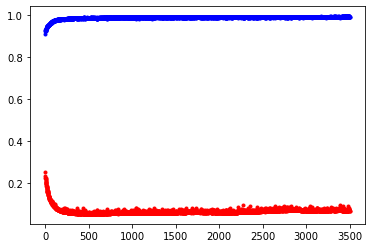

In [19]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()